Instagram is a top social media platform, widely used for business promotion, portfolio building, blogging, and content creation. However, its constant changes can impact the reach of our posts over time. To succeed on Instagram, content creators must analyze their Instagram data. This is where Data Science comes in. In this article, we'll explore how to perform Instagram Reach Analysis using Python, offering valuable insights for content creators to adapt and thrive on the platform despite its evolving nature.

To begin analyzing the reach of your Instagram account, you need to import the necessary Python libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor



In [2]:
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')

Before diving into data analysis, it's important to check for null values in your dataset to ensure data quality. 

In [3]:
data.size

1547

In [26]:
data.isnull().sum()


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Now, let's start with analyzing the reach of my Instagram posts. First, I will take a look at the distribution of impressions I have received from home.

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_14892\805513495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


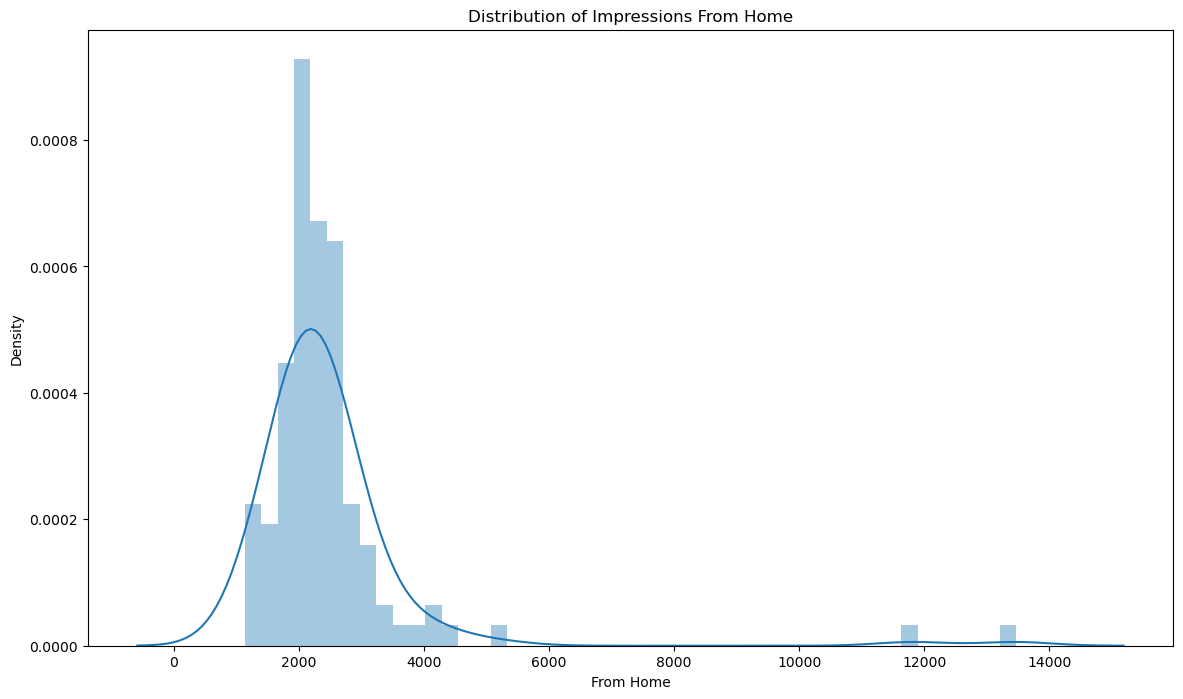

In [9]:
plt.figure(figsize=(14, 8))
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impressions I get from the home section on Instagram show how much my posts reach my followers. When I examine the impressions from home, I can say it's challenging to reach all my followers daily. Now, let's take a look at the distribution of the impressions I received from hashtags.

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_14892\2806915297.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


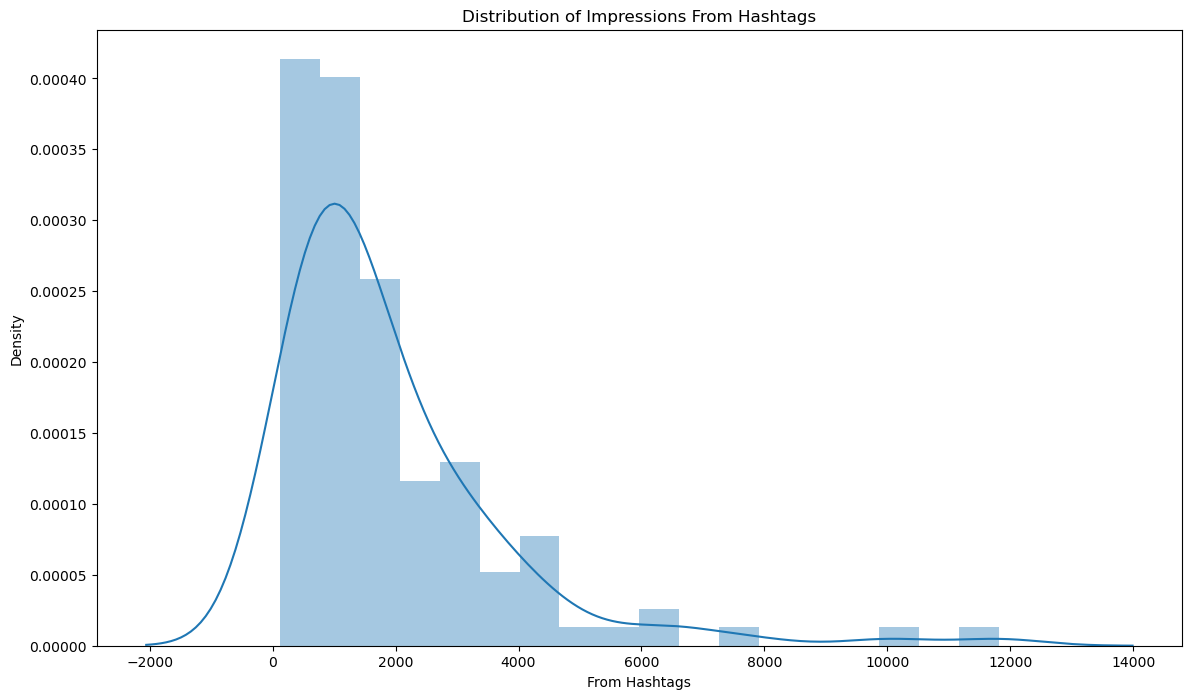

In [10]:
plt.figure(figsize=(14, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtags are tools I use to categorize my posts on Instagram so that I can reach more people based on the kind of content I am creating. When I examine hashtag impressions, it becomes clear that not all posts can be reached using hashtags, but they do allow me to reach many new users. Now, let's shift our focus to the distribution of impressions I have received from the explore section of Instagram.

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_14892\1198113399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


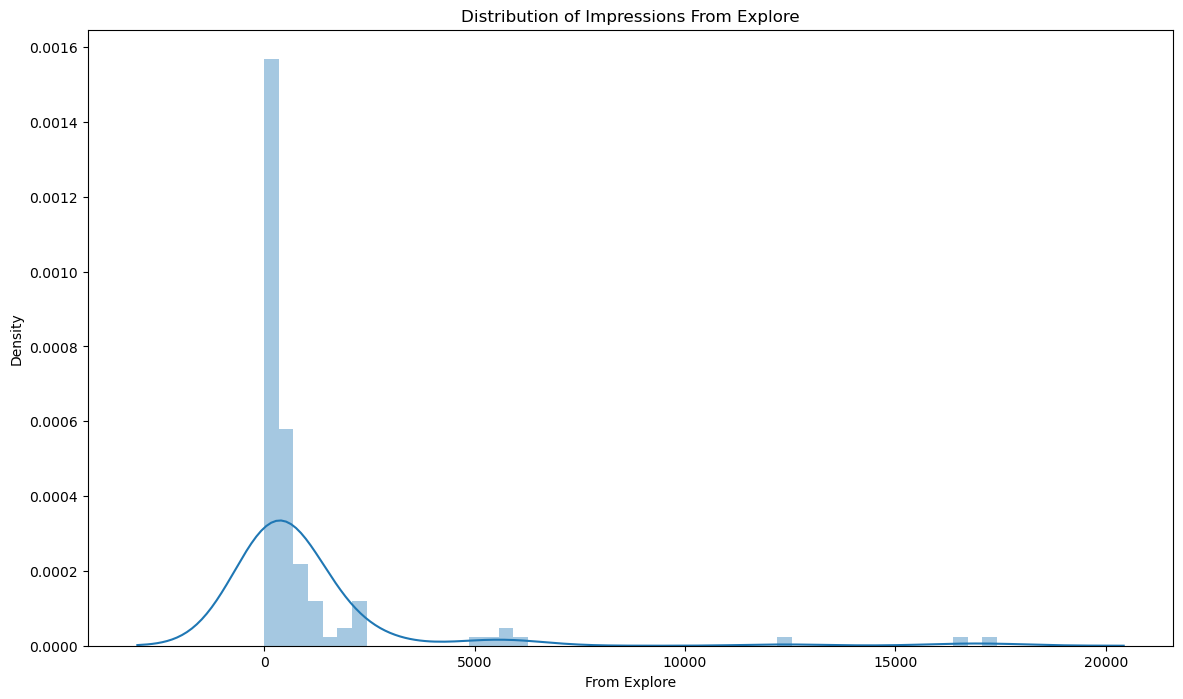

<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

In [7]:
plt.figure(figsize=(14, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

plt.figure(figsize=(14,12))

The explore section of Instagram serves as the recommendation system of the platform, offering users posts based on their preferences and interests. As I analyze the impressions I have received from the explore section, it's clear that Instagram doesn't recommend our posts to users as often. While some posts have achieved a reasonable reach from the explore section, it's still considerably lower when compared to the reach I gain from hashtags.

Now, let's turn our attention to the percentage of impressions I receive from various sources on Instagram.

In [39]:
home, hashtags, explore, other = data["From Home"].sum(), data["From Hashtags"].sum(), data["From Explore"].sum(), data["From Other"].sum()
labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
fig = px.pie(data, values=values, names=labels, title='Impressions From Various Sources for instagram post', hole=0.5)
fig.show()

The donut plot above reveals that approximately 44 percent of the reach comes from my followers, 33.6 percent from hashtags, 19.2 percent from the explore section, and 3.05 percent from other sources.

<H1>Analyzing Content</H1><br><br>
Now, let's delve into the analysis of the content in my Instagram posts. The dataset comprises two columns, namely caption and hashtags, which will provide insights into the type of content I post on Instagram.

I will create a wordcloud of the caption column to visualize the most frequently used words in the captions of my Instagram posts.

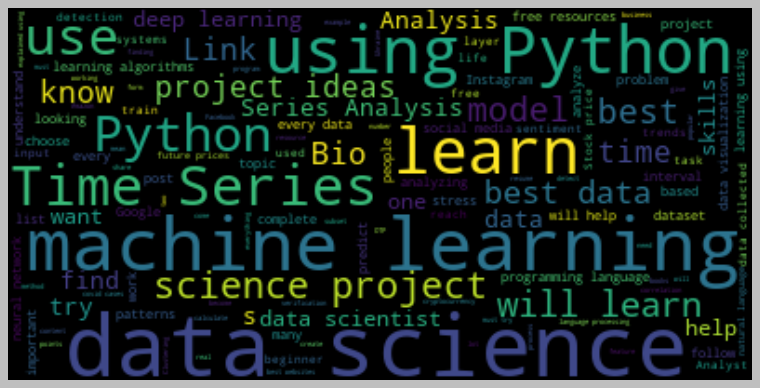

In [40]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Now, let's proceed to create a wordcloud of the hashtags column to visually identify the most frequently used hashtags in my Instagram posts.

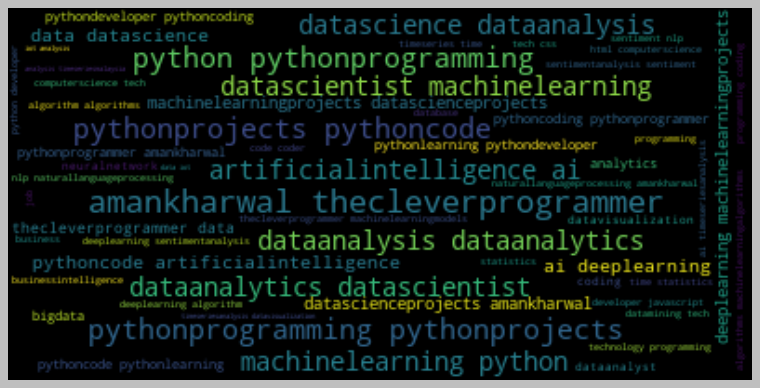

In [13]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<H1>Analyzing Relationships

Now, let's engage in the analysis of relationships to identify the most significant factors affecting our Instagram reach. This analysis will provide valuable insights into how the Instagram algorithm functions.

We'll begin by examining the relationship between the number of likes and the number of impressions on my Instagram posts.

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",y="Likes", size="Likes", trendline="ols",title = "Relationship Between Likes and Impressions")
figure.show()

Indeed, it's evident that there is a linear relationship between the number of likes and the reach I achieve on Instagram. Now, let's explore the relationship between the number of comments and the number of impressions on my Instagram posts.

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

It appears that the number of comments doesn't have a significant impact on the reach of a post. Now, let's investigate the relationship between the number of shares and the number of impressions to see if there is a correlation.

In [16]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

It seems that a higher number of shares does lead to a greater reach, although shares don't have as substantial an impact on the reach of a post as likes do. Now, let's turn our attention to the relationship between the number of saves and the number of impressions.

In [28]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

We have observed a <U><B> linear relationship between the number of times my post is saved and the reach of my Instagram post</B></U>. Now, let's examine the correlation between all the columns and the "Impressions" column to gain a comprehensive understanding of how each factor relates to the reach of my Instagram posts.

In [18]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\Plaksha\AppData\Local\Temp\ipykernel_14892\3935629544.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



From the analysis, it's evident that a higher number of likes and saves are positively correlated with increased reach on Instagram. Moreover, a larger number of shares can contribute to greater reach, although it doesn't have as significant an impact as likes and saves. On the other hand, a low number of shares doesn't seem to significantly affect the reach of your posts.

In [19]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


A conversion rate of 31% is indeed impressive. Now, let's explore the relationship between the total profile visits and the number of followers gained from all profile visits to better understand how these factors are related.

In [20]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

It appears that there is a linear relationship between profile visits and the number of followers gained. This suggests that as the number of profile visits increases, the number of followers gained also tends to increase proportionally.

<H1>Instagram Reach Prediction Model


In this section, I'll proceed with splitting the data into training and test sets before we train a machine learning model to predict the reach of an Instagram post. Please specify how you'd like to split the data (e.g., the proportion of data for training and testing), and I'll guide you through the process.

In [21]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

In [22]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9125304170809502

 We can proceed with predicting the reach of an Instagram post using a machine learning model

In [23]:

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12251.8370712])